In [1]:
import pandas as pd
import seaborn as sea


In [2]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','class'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.preprocessing import StandardScaler

x = iris.drop('class', axis=1)
y = iris['class']

x = pd.DataFrame(StandardScaler().fit_transform(x), columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
x.head()


,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca_iris = pca.fit_transform(x)
pca_iris = pd.DataFrame(data = pca_iris, columns =['pc1','pc2'])
pca_iris.head()

,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [5]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [6]:
#Concatenate the class variable
pca_iris_concat = pd.concat([pca_iris, y], axis = 1)


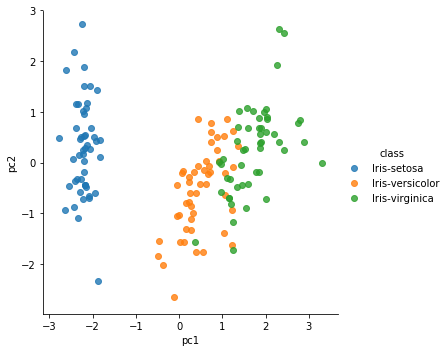

In [7]:
sea.lmplot(x='pc1', y='pc2', data=pca_iris_concat, hue='class', fit_reg= False)

In [8]:
from sklearn.cluster import KMeans

In [9]:
ss = []
for i in range (1,9):
    kmeans =KMeans(n_clusters=i, random_state=0, max_iter=10, init='random').fit(pca_iris)
    ss.append(kmeans.inertia_)

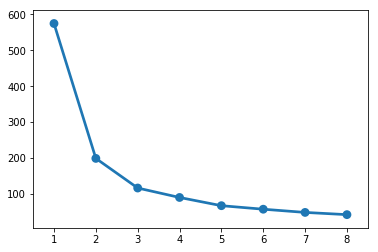

In [10]:
sea.pointplot(x=[j for j in range(1,9)], y= ss)

In [11]:
import matplotlib.pyplot as plt

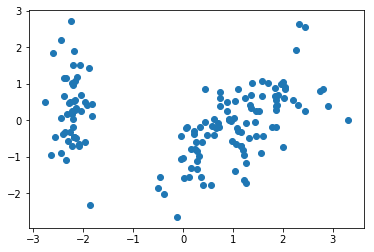

In [12]:
plt.scatter(pca_iris['pc1'],pca_iris['pc2'] )

In [13]:
kmeans =KMeans(n_clusters=3, max_iter=10, init='random').fit(pca_iris)
y_pred =kmeans.predict(pca_iris)



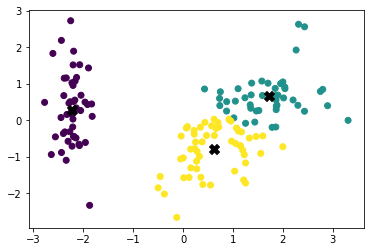

In [14]:
plt.scatter(pca_iris['pc1'],pca_iris['pc2'], c=y_pred )
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], c='black' , s=100, marker='X')

# Linear discriminant analysis

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
lda_iris = lda.fit_transform(x,y)
lda_iris = pd.DataFrame(data = lda_iris, columns = ['c1','c2'])


In [16]:
lda_iris_concat = pd.concat([lda_iris, y], axis = 1)


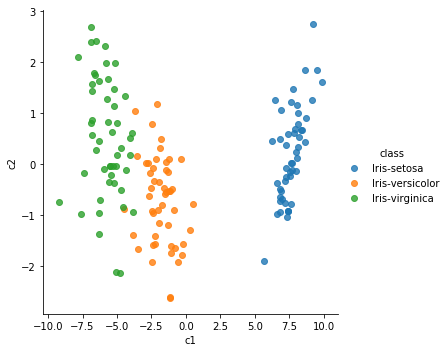

In [17]:
sea.lmplot(x='c1', y='c2', data = lda_iris_concat, hue='class', fit_reg=False)

In [18]:
from sklearn.model_selection import train_test_split as tts

In [19]:
x_train,x_test, y_train,y_test = tts(x,y,test_size=0.25, random_state=0)

In [20]:
#gradient booster
from sklearn.ensemble import GradientBoostingClassifier as booster

In [21]:
gbc = booster()

In [22]:
gbc.fit(x_train, y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [24]:
gbc.score(x_test,y_test)

0.9736842105263158